# **Time Series Prediction on Gold Prices**

## Introduction

This Kaggle endeavor furnishes code aimed at prognosticating the gold price utilizing diverse time series forecasting techniques. The dataset under scrutiny encompasses the daily gold price in USD from January 1950 to July 2020, aggregating 847 data points. Within the repository lies a Jupyter notebook containing scripts for constructing and assessing three distinct time series forecasting models: Linear Regression Model, Naive Model, and Exponential Smoothing Model. Notably, the Exponential Smoothing Model emerged as the most effective, achieving a MAPE score of 17.235%. Furthermore, the anticipated gold prices spanning from August 2020 to February 2025, derived through the Exponential Smoothing Model, are encapsulated within a CSV file labeled as gold_price_predictions.csv. Access to the dataset, codebase, and findings is facilitated via the Kaggle project and Github repository, both referenced herein.

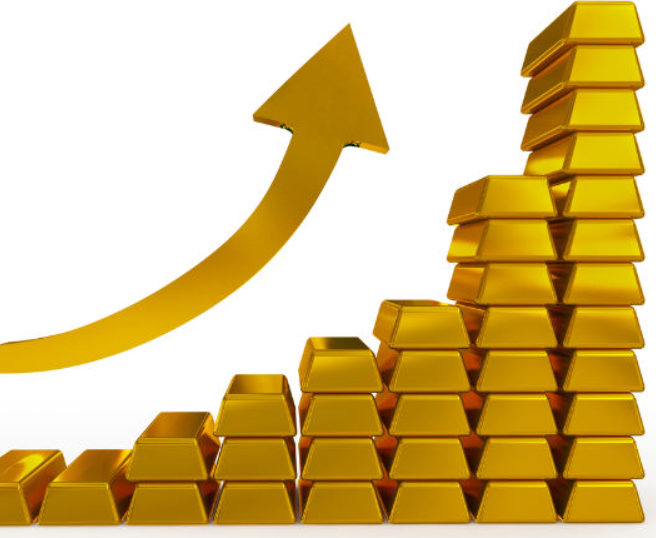

In [1]:
# !pip install pandas-profiling

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Read the CSV file and display the first few rows
df = pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [8]:
#Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [9]:
# Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
df['month'] = date_range
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


<Figure size 2000x800 with 0 Axes>

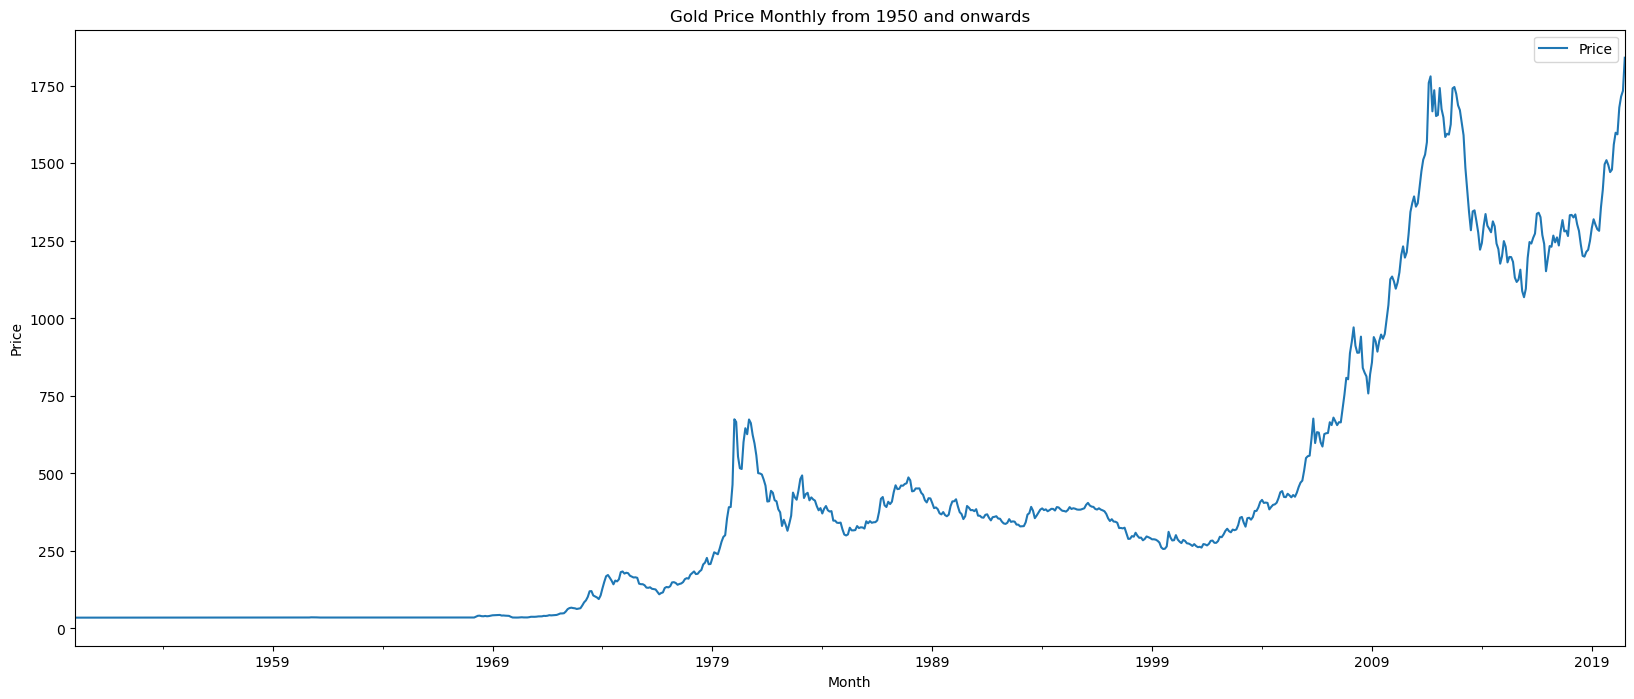

In [10]:
# Plot the gold prices over time
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

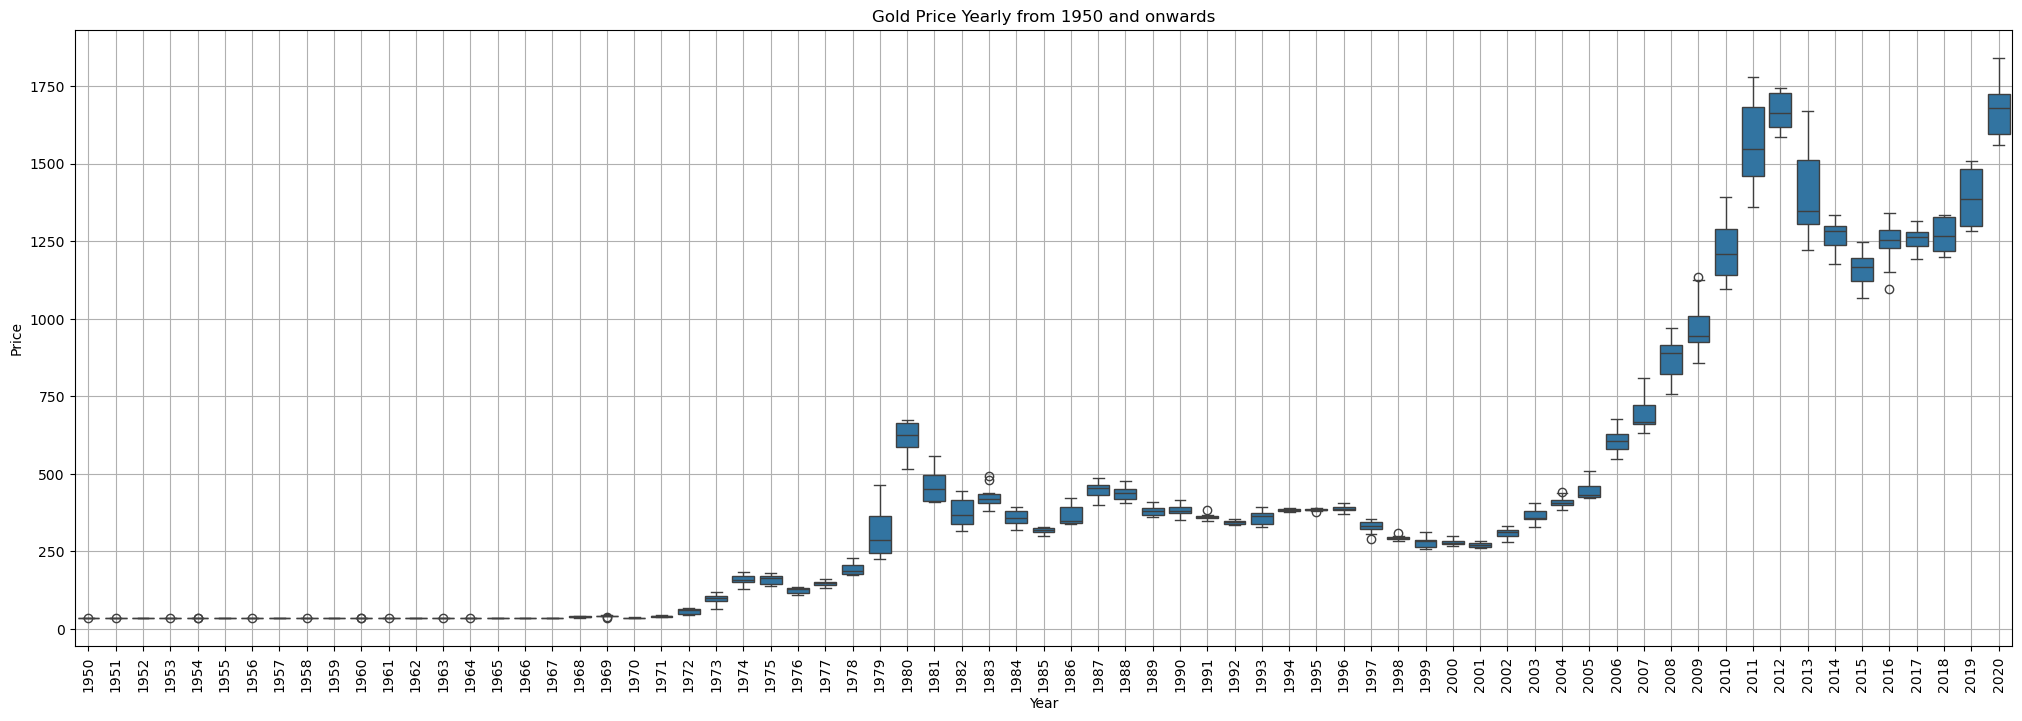

In [11]:
# boxplot of the gold prices by year
plt.figure(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.title('Gold Price Yearly from 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [14]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


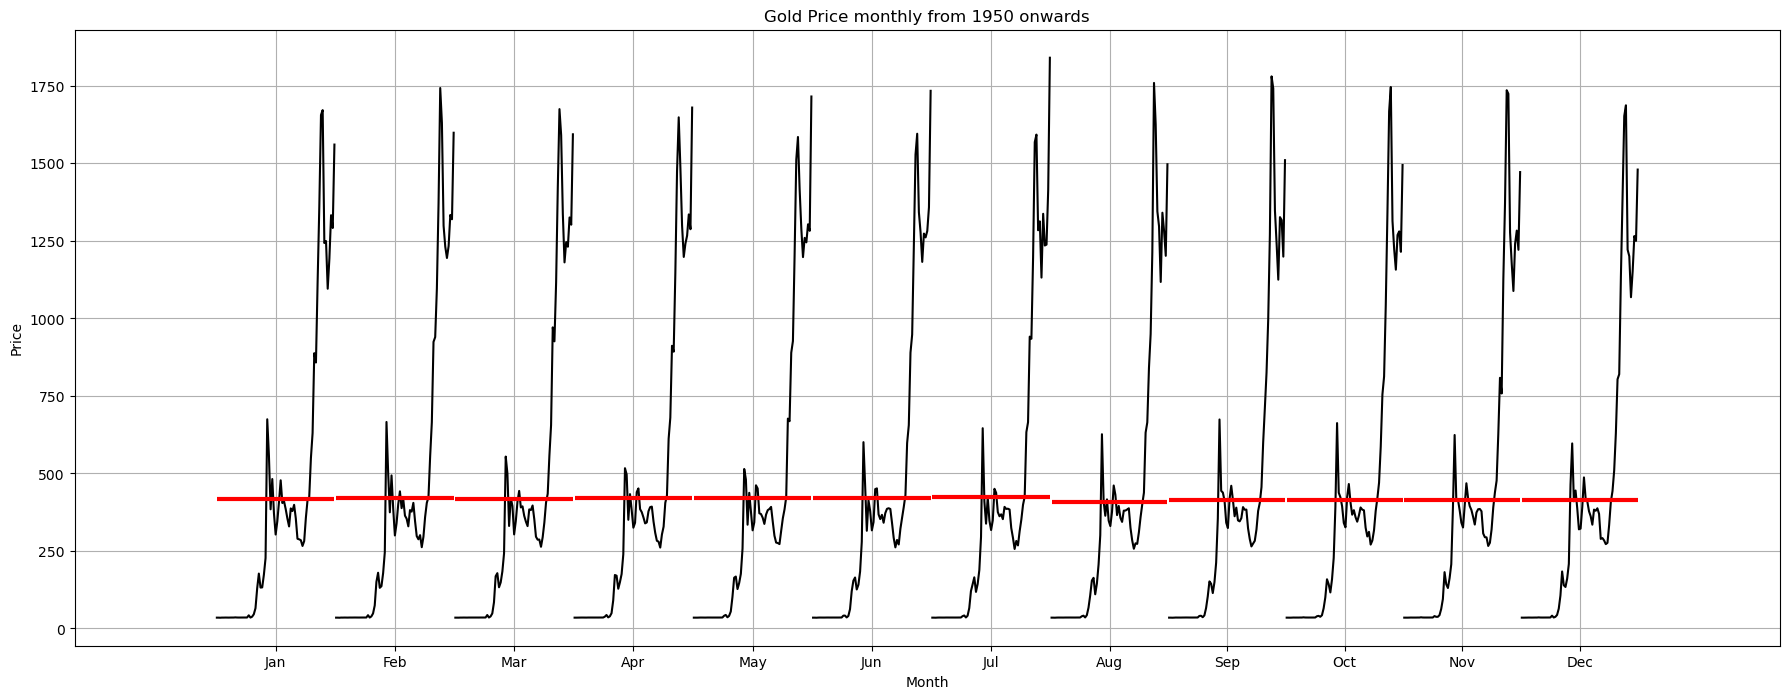

In [15]:
from statsmodels.graphics.tsaplots import month_plot

# Plot the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Gold Price', ax=ax)
plt.title('Gold Price monthly from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

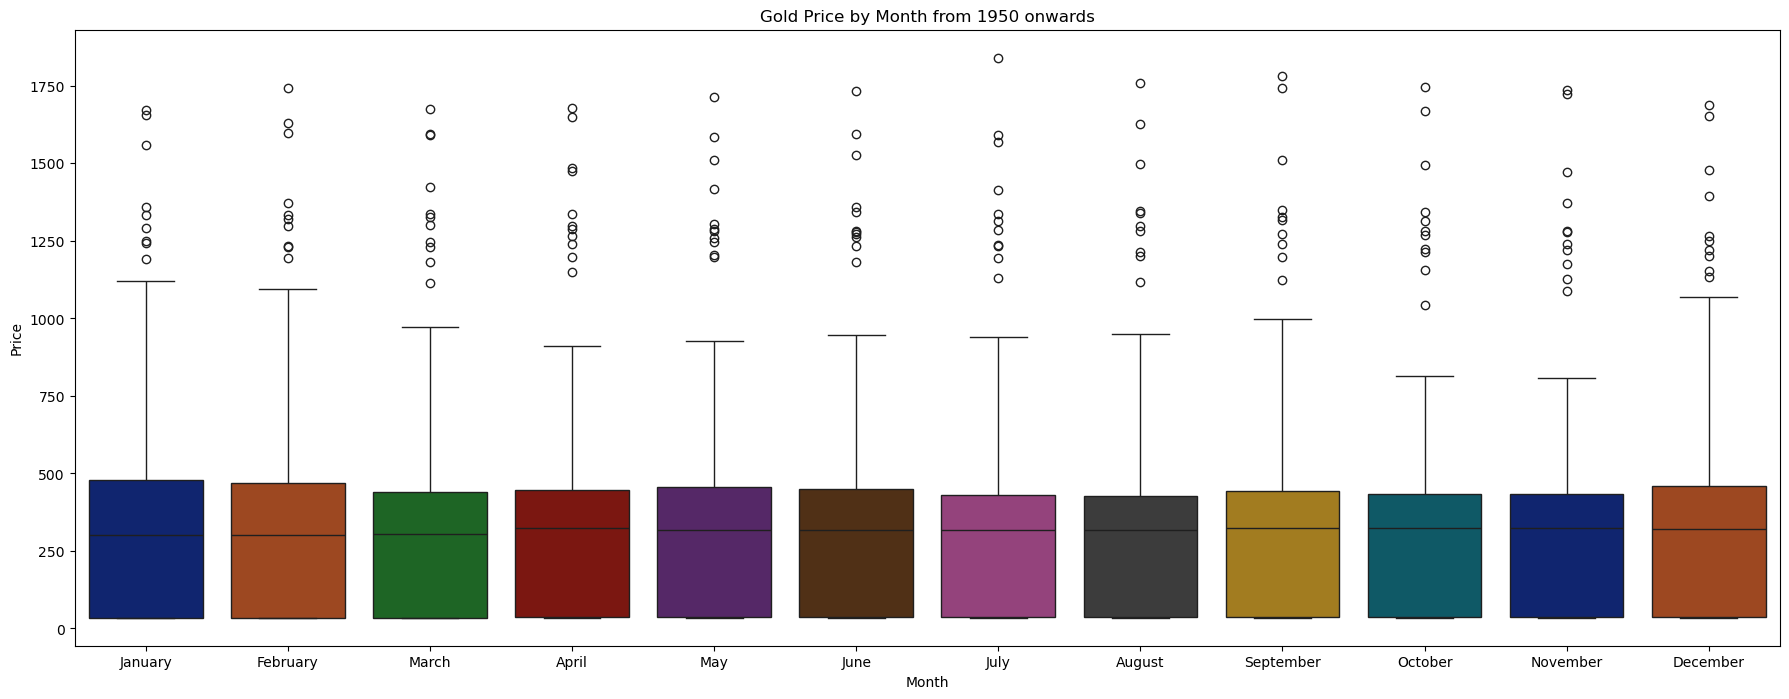

In [17]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax, palette = 'dark')
plt.title('Gold Price by Month from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

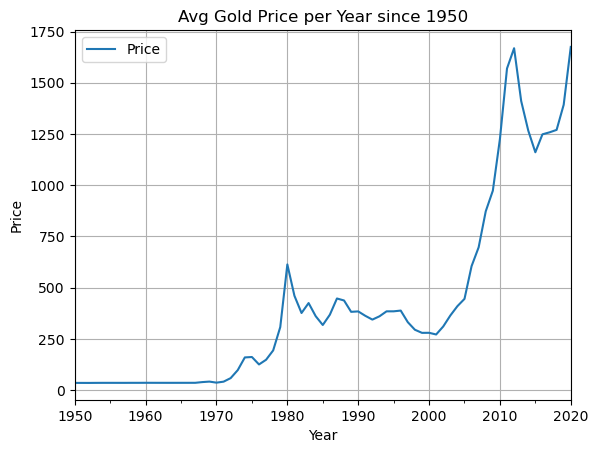

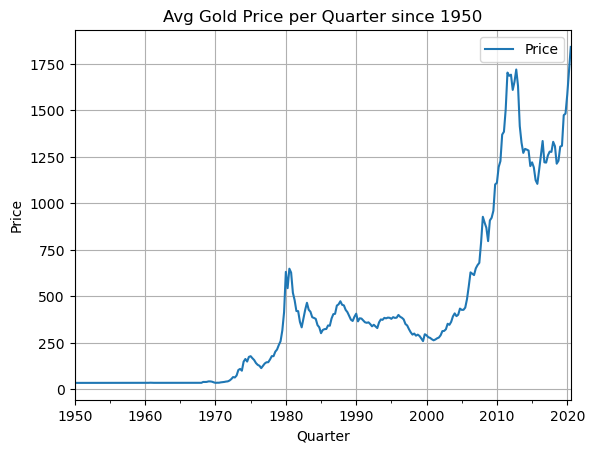

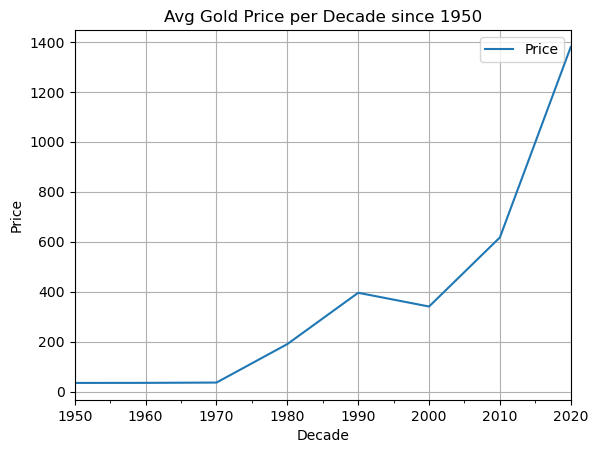

In [18]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

The first few rows of the coefficient of variation data:
            Mean       Std  Cov_pct
month                              
1950   34.729167  0.002887     0.01
1951   34.717500  0.020057     0.06
1952   34.628333  0.117538     0.34
1953   34.879167  0.056481     0.16
1954   35.020000  0.082792     0.24


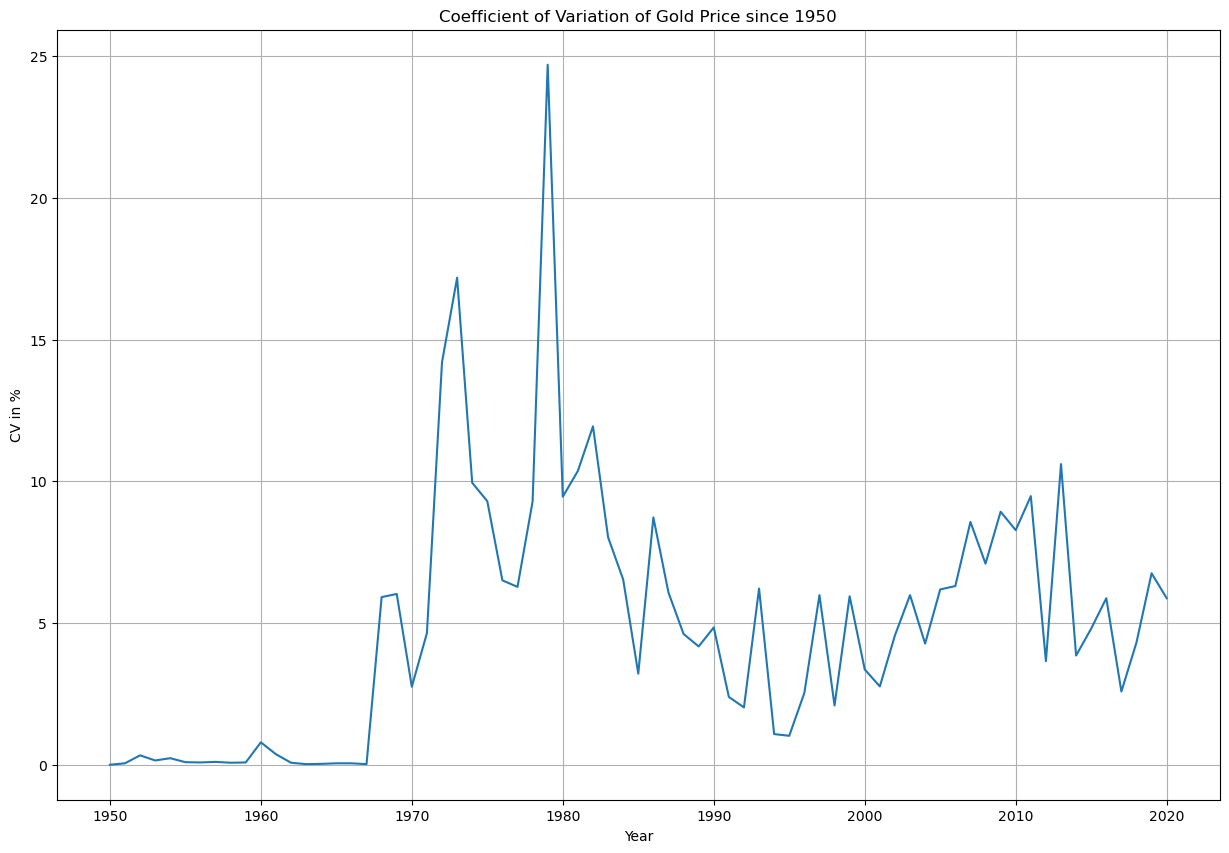

In [19]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())

In [21]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]


# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

Training set shape: (792, 1)
Testing set shape: (55, 1)
Percentage of data in training set: 93.51 %
Percentage of data in testing set: 6.49 %


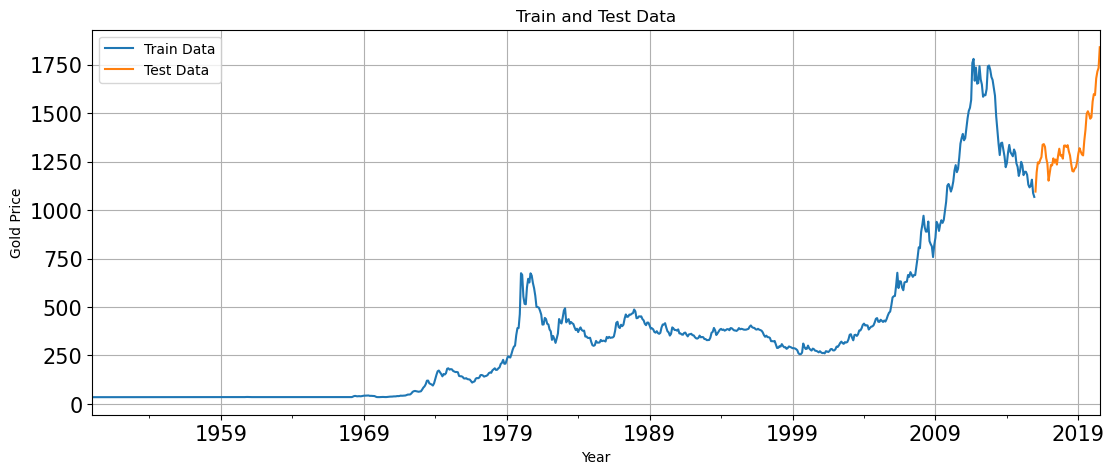

In [13]:
# Plot train and test data
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()


In [22]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 792
Test time series length: 55


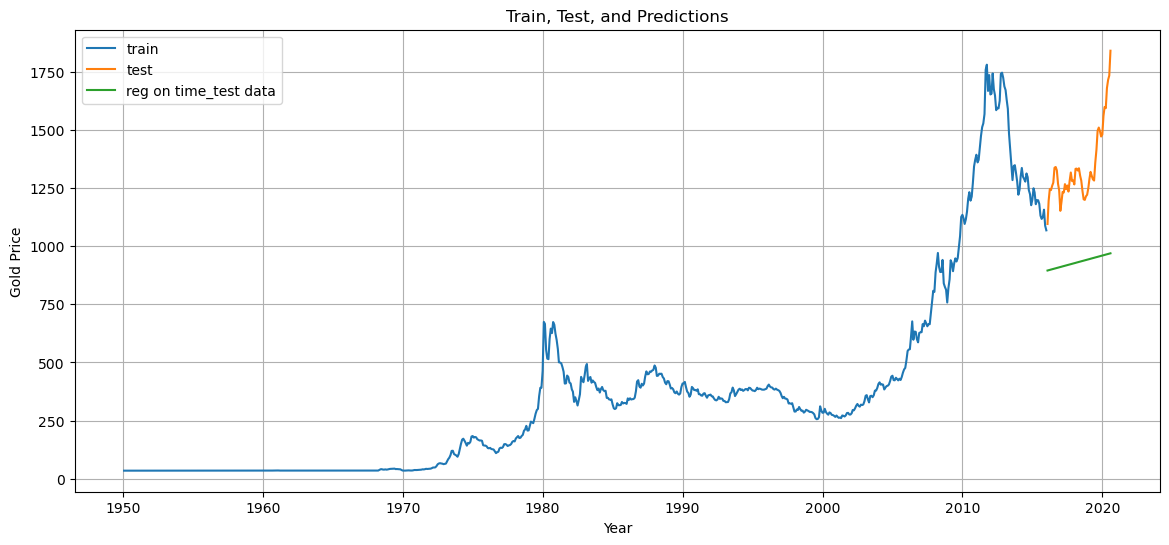

In [24]:
# Train a linear regression model on the train data using time as the independent variable
model = LinearRegression()
model.fit(LR_train[['time']], LR_train['Price'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = model.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [25]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 29.760%


In [26]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,29.759658


In [27]:
# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price']) [len(np.asarray(train['Price'])) - 1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

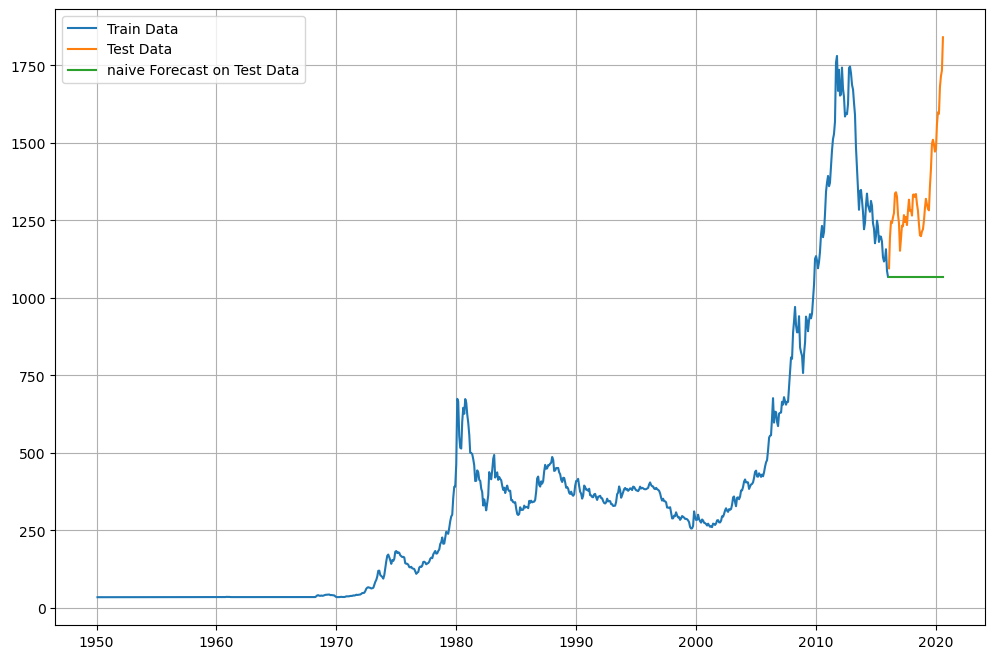

In [28]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train Data')
plt.plot(test['Price'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [29]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 19.385%


,Test MAPE (%)
Regression on Time,29.759658
naiveForecast,19.384586


In [30]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 17.236%


In [31]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month') 

print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2020-08-31,1684.713703,1792.864676,1901.015650
2020-09-30,1615.291065,1723.442039,1831.593012
2020-10-31,1538.543199,1646.694172,1754.845146
2020-11-30,1476.724385,1584.875359,1693.026332
2020-12-31,1459.285045,1567.436019,1675.586992
2021-01-31,1514.369725,1622.520699,1730.671672
2021-02-28,1545.301712,1653.452686,1761.603659
2021-03-31,1556.713533,1664.864506,1773.015479
2021-04-30,1648.260721,1756.411695,1864.562668
2021-05-31,1694.179281,1802.330255,1910.481228


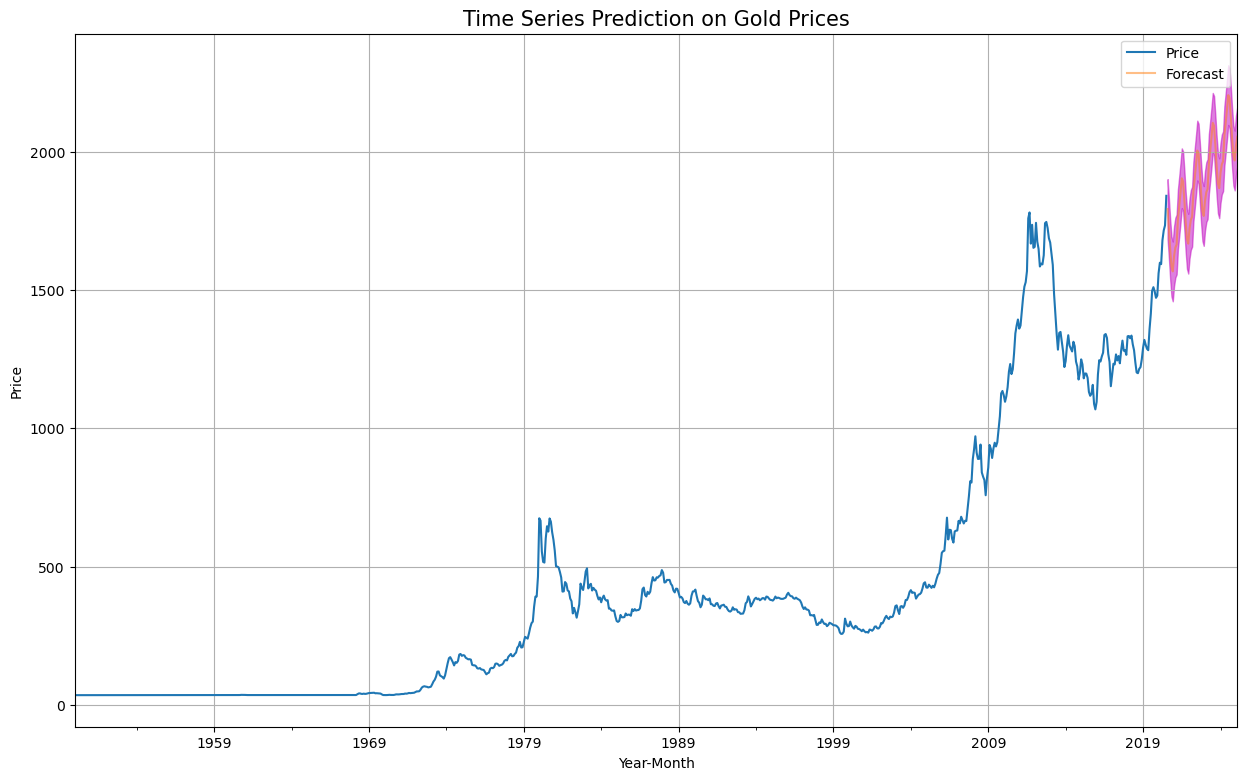

In [33]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()